# **Table of Content** 📝
> ### 1. Introduction
> ### 2. What is XGBoost ??
> ### 3. Importing Library
> ### 4. Loading Dataset
> ### 5. Checking for Null Values
> ### 6. EDA
> ### 7. Splitting Data
> ### 8. Building XGBoost Model
> ### 9. Predicting Next 10 Days
> ### 10. Conclusion

![](https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F1196863012%2FA-physical-imitation-of-a-Bitcoin%2F960x0.jpg%3Ffit%3Dscale)

# 1. Introduction 📎

## This Notebook is all about Bitcoin Price Prediction using XGBoost Algorithm
##  Bitcoin, often described as a cryptocurrency, a virtual currency or a digital currency - is a type of money that is completely virtual. It's like an online version of cash. Each Bitcoin is basically a computer file which is stored in a 'digital wallet' app on a smartphone or computer.
##  XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) A wide range of applications: Can be used to solve regression, classification, ranking, and user-defined prediction problems.

### To know more about Bitcoin: [Click Here](https://en.wikipedia.org/wiki/Bitcoin) 
### To know more about XGBoost: [Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

# 2. What is XGBoost?
> XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.

> XGBoost algorithm was developed as a research project at the University of Washington. Tianqi Chen and Carlos Guestrin presented their paper at SIGKDD Conference in 2016 and caught the Machine Learning world by fire. Since its introduction, this algorithm has not only been credited with winning numerous Kaggle competitions but also for being the driving force under the hood for several cutting-edge industry applications. As a result, there is a strong community of data scientists contributing to the XGBoost open source projects with ~350 contributors and ~3,600 commits on GitHub

![](https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg)

For more information [Click Here](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d) 

# 3. Importing Library 📚

In [9]:
# Here we are importing Library which are required 
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import yfinance as yf

# 4. Loading Dataset 📚
> ### Dataset: [Click Here](https://www.kaggle.com/meetnagadia/bitcoin-stock-data-sept-17-2014-august-24-2021)

### About Data
> 1. Date - Date.
> 2. Open - It is the price at which the financial security opens in the market when trading begins.
> 3. High - The high is the highest price at which a stock traded during a period.
> 4. Low - Low is the minimum price of a stock in a period.
> 5. Close - Closing price generally refers to the last price at which a stock trades during a regular trading session.
> 6. Adj Close - The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any
> 7. Volume - Volume measures the number of shares traded in a stock or contracts traded in futures or options. 

In [14]:
# Obtener datos históricos de BTC/USDT desde Yahoo Finance
ticker = "BTC-USD"
data = yf.download(ticker, start="2015-01-01", end="2024-05-27")

[*********************100%%**********************]  1 of 1 completed


In [2]:
# Loading Dataset and remainig its columns

data=pd.read_csv('../input/bitcoin-stock-data-sept-17-2014-august-24-2021/BTC-USD.csv')
data = data.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})

In [15]:
# Displaying first 5 rows of the dataset

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [21]:
data.reset_index(inplace=True)

In [22]:
# Displaying Last 5 rows of the dataset

data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3429,2024-05-22,70135.320312,70623.695312,68977.695312,69122.335938,69122.335938,32802561717
3430,2024-05-23,69121.304688,70041.273438,66356.953125,67929.562500,67929.562500,41895680979
3431,2024-05-24,67928.132812,69220.296875,66622.671875,68526.101562,68526.101562,29197308153
3432,2024-05-25,68526.921875,69579.320312,68515.820312,69265.945312,69265.945312,15473071741
3433,2024-05-26,69264.289062,69506.226562,68183.890625,68518.093750,68518.093750,15628433737


In [23]:
data.shape

(3434, 7)

In [24]:
# describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3434,3434.000000,3434.000000,3434.000000,3434.000000,3434.000000,3.434000e+03
mean,2019-09-13 11:59:59.999999744,16864.377698,17256.755315,16445.960291,16882.961285,16882.961285,1.776337e+10
min,2015-01-01 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,2017-05-08 06:00:00,1628.470032,1738.997467,1610.460022,1723.572479,1723.572479,7.181003e+08
50%,2019-09-13 12:00:00,9135.920898,9287.937988,8918.138672,9140.787598,9140.787598,1.382059e+10
75%,2022-01-18 18:00:00,27740.363281,28237.765137,27215.889648,27761.898438,27761.898438,2.841740e+10
max,2024-05-26 00:00:00,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11
std,NaN,18236.958715,18668.532285,17762.933903,18253.704773,18253.704773,1.929422e+10


# 5. Checking for null values

In [25]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Convert date field from string to Date format 

In [29]:
data['Date'] = pd.to_datetime(data.Date)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


Finding the duration of dataset

In [30]:
print("Starting date: ",data.iloc[0][0])
print("Ending date: ", data.iloc[-1][0])
print("Duration: ", data.iloc[-1][0]-data.iloc[0][0])

Starting date:  2015-01-01 00:00:00
Ending date:  2024-05-26 00:00:00
Duration:  3433 days 00:00:00


C:\Users\lufer\AppData\Local\Temp\ipykernel_10988\3195089649.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\lufer\AppData\Local\Temp\ipykernel_10988\3195089649.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\lufer\AppData\Local\Temp\ipykernel_10988\3195089649.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# 6. EDA  📊 📈 📉
- EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing irregularities in the data. Based on the results of EDA, companies also make business decisions, which can have repercussions later

## Visualizing Dataset for Year 2014

In [33]:
y_2014 = data.loc[(data['Date'] >= '2015-01-01')
                     & (data['Date'] < '2016-01-01')]

y_2014.drop(y_2014[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2015-01-01,320.434998,320.434998,314.002991,314.248993
1,2015-01-02,314.079010,315.838989,313.565002,315.032013
2,2015-01-03,314.846008,315.149994,281.082001,281.082001
3,2015-01-04,281.145996,287.230011,257.612000,264.195007
4,2015-01-05,265.084015,278.341003,265.084015,274.473999
...,...,...,...,...,...
360,2015-12-27,416.514008,424.006989,408.882996,422.822998
361,2015-12-28,423.342987,429.769012,418.480988,422.278992
362,2015-12-29,422.097992,432.983002,420.627014,432.983002
363,2015-12-30,433.299988,434.386993,422.084015,426.619995


In [34]:
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,251.799905,248.782547
February,232.821856,234.153645
March,269.278419,269.042259
April,235.708668,235.491534
May,237.161806,236.997001
June,236.941433,238.081766
July,278.857679,279.563740
August,252.986774,250.733805
September,233.486733,233.595533


### Since our data start from 2014-09-17 thats why its showing Nan before Semptember

In [39]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'crimson'},
              'name': 'Stock Open Price',
              'type': 'bar',
              'x': array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                          'August', 'September', 'October', 'November', 'December'], dtype=object),
              'y': array([251.7999051 , 232.82185636, 269.27841925, 235.7086675 , 237.16180617,
                          236.9414327 , 278.85767931, 252.98677408, 233.48673299, 262.30599976,
                          346.8668335 , 422.61803313])},
             {'marker': {'color': 'lightsalmon'},
              'name': 'Stock Close Price',
              'type': 'bar',
              'x': array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                          'August', 'September', 'October', 'November', 'December'], dtype=object),
              'y': array([248.78254749, 234.15364456, 269.04225897, 235.49153392, 236.99700091,
                          238.08176575, 279.5637399 , 250.73380501, 233.59553324, 264.85535554,
                          348.88333232, 424.46454743])}],
    'layout': {'barmode': 'group',
               'template': '...',
               'title': {'text': 'Monthwise comparision between Stock open and close price'},
               'xaxis': {'tickangle': -45}}
})

In [42]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'rgb(0, 153, 204)'},
              'name': 'Stock high Price',
              'type': 'bar',
              'x': array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                          'August', 'September', 'October', 'November', 'December'], dtype=object),
              'y': array([320.43499756, 265.61099243, 300.04400635, 261.79800415, 247.80400085,
                          267.86700439, 314.39401245, 285.71499634, 259.18200684, 334.16900635,
                          495.56201172, 469.10299683])},
             {'marker': {'color': 'rgb(255, 128, 0)'},
              'name': 'Stock low Price',
              'type': 'bar',
              'x': array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                          'August', 'September', 'October', 'November', 'December'], dtype=object),
              'y': array([171.50999451, 212.01499939, 236.51499939, 214.87399292, 228.57299805,
                          221.29600525, 253.50500488, 199.56700134, 225.11700439, 235.61599731,
                          300.99700928, 349.46499634])}],
    'layout': {'barmode': 'group', 'template': '...', 'title': {'text': ' Monthwise High and Low stock price'}}
})

In [46]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'], 
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Open<br>Date=%{x}<br>Stock value=%{y}<extra></extra>',
              'legendgroup': 'Open',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Stock Open Price',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 2, 0, 0),
                          datetime.datetime(2015, 1, 3, 0, 0), ...,
                          datetime.datetime(2015, 12, 29, 0, 0),
                          datetime.datetime(2015, 12, 30, 0, 0),
                          datetime.datetime(2015, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([320.43499756, 314.07901001, 314.8460083 , ..., 422.09799194,
                          433.29998779, 425.875     ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Close<br>Date=%{x}<br>Stock value=%{y}<extra></extra>',
              'legendgroup': 'Close',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Stock Close Price',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 2, 0, 0),
                          datetime.datetime(2015, 1, 3, 0, 0), ...,
                          datetime.datetime(2015, 12, 29, 0, 0),
                          datetime.datetime(2015, 12, 30, 0, 0),
                          datetime.datetime(2015, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([314.24899292, 315.03201294, 281.08200073, ..., 432.98300171,
                          426.61999512, 430.56698608]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=High<br>Date=%{x}<br>Stock value=%{y}<extra></extra>',
              'legendgroup': 'High',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Stock High Price',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 2, 0, 0),
                          datetime.datetime(2015, 1, 3, 0, 0), ...,
                          datetime.datetime(2015, 12, 29, 0, 0),
                          datetime.datetime(2015, 12, 30, 0, 0),
                          datetime.datetime(2015, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([320.43499756, 315.83898926, 315.1499939 , ..., 432.98300171,
                          434.38699341, 432.92098999]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Low<br>Date=%{x}<br>Stock value=%{y}<extra></extra>',
              'legendgroup': 'Low',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Stock Low Price',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 2, 0, 0),
                          datetime.datetime(2015, 1, 3, 0, 0), ...,
                          datetime.datetime(2015, 12, 29, 0, 0),
                          datetime.datetime(2015, 12, 30, 0, 0),
                          datetime.datetime(2015, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([314.00299072, 313.56500244, 281.08200073, ..., 420.62701416,
                          422.08401489, 418.73498535]),
              'yaxis': 'y'}],
    'layout': {'font': {'color': 'black', 

### Visualizing Dataset for Year 2020

In [49]:
y_2020 = data.loc[(data['Date'] >= '2020-01-01')
                     & (data['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1826,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
1827,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
1828,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
1829,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
1830,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
2187,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922
2188,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
2189,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500
2190,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125


In [50]:
monthvise= y_2020.groupby(y_2020['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

KeyError: 'date'

In [17]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [18]:
y_2020.groupby(y_2020['date'].dt.strftime('%B'))['low'].min()
monthvise_high = y_2020.groupby(data['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [19]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.date, y=[y_2020['open'], y_2020['close'], 
                                          y_2020['high'], y_2020['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Visualizing Dataset for Year 2021

In [20]:
y_2021 = data.loc[(data['date'] >= '2021-01-01')
                     & (data['date'] < '2021-12-31')]

y_2021.drop(y_2021[['adj_close','volume']],axis=1)

,date,open,high,low,close
2298,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
2529,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781
2530,2021-08-21,49327.074219,49717.019531,48312.199219,48905.492188
2531,2021-08-22,48869.105469,49471.609375,48199.941406,49321.652344
2532,2021-08-23,49291.675781,50482.078125,49074.605469,49546.148438


In [21]:
monthvise= y_2021.groupby(y_2021['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
date,,
January,34652.961694,34703.053428
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,44726.296387,45037.076498
September,NaN,NaN


#### Since we had data till September, so after September its showing NaN

In [22]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [23]:
y_2021.groupby(y_2021['date'].dt.strftime('%B'))['low'].min()
monthvise_high = y_2021.groupby(data['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [24]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.date, y=[y_2021['open'], y_2021['close'], 
                                          y_2021['high'], y_2021['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Overall Analysis from 

In [25]:
y_overall=data
y_overall.drop(y_overall[['adj_close','volume']],axis=1)

,date,open,high,low,close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...,...
2529,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781
2530,2021-08-21,49327.074219,49717.019531,48312.199219,48905.492188
2531,2021-08-22,48869.105469,49471.609375,48199.941406,49321.652344
2532,2021-08-23,49291.675781,50482.078125,49074.605469,49546.148438


In [26]:
monthvise= y_overall.groupby(y_overall['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)

In [27]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.date, y=[y_overall['open'], y_overall['close'], 
                                          y_overall['high'], y_overall['low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Creating new dataframe of Bitcoin data containing only date and closing price

In [52]:
closedf = data[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3434, 2)


In [54]:
closedf = closedf[closedf['Date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1351


### Normalizing close price value

In [56]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1351, 1)


# 7. Separate data for Train and Test 🎬

In [75]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1080, 1)
test_data:  (271, 1)


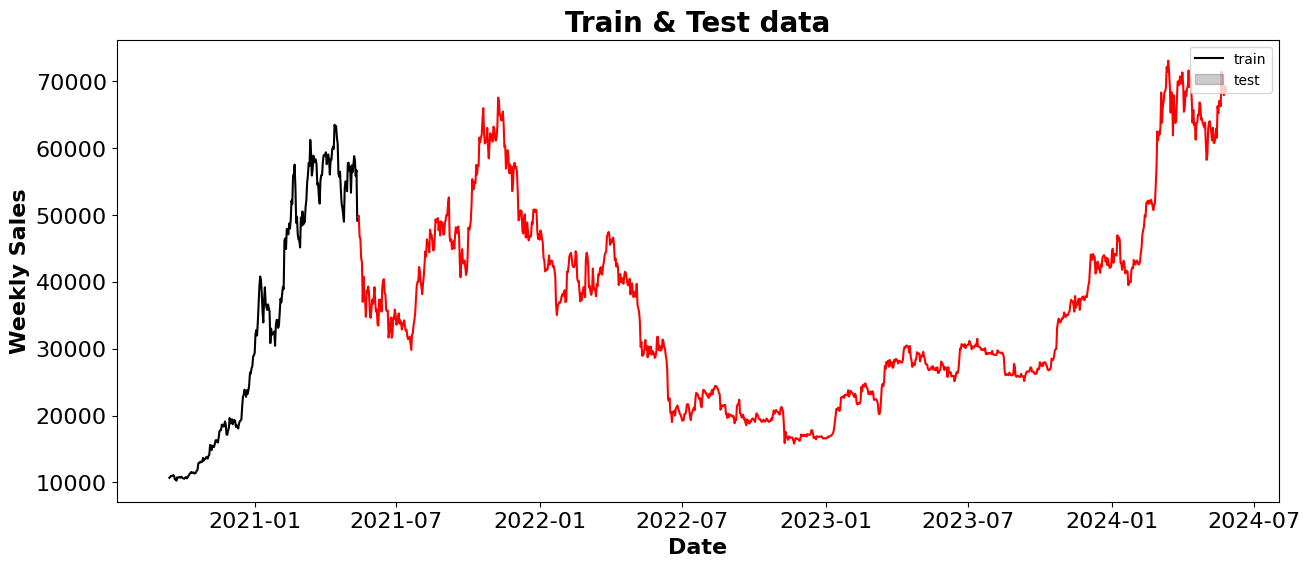

In [76]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['Date'][:241], y = close_stock['Close'][:241], color = 'black')
sns.lineplot(x = close_stock['Date'][241:], y = close_stock['Close'][241:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.show()

# Prepare train data for time series analysis

In [60]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [61]:
time_step = 21
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (923, 21)
y_train:  (923,)
X_test:  (384, 21)
y_test (384,)


In [78]:
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.006917,0.008765,0.011597,0.011184,0.011114,0.013498,0.011014,0.003439,0.004651,0.000000,...,0.007106,0.008029,0.008420,0.007376,0.009524,0.008567,0.005940,0.005248,0.004824,0.006738
1,0.008765,0.011597,0.011184,0.011114,0.013498,0.011014,0.003439,0.004651,0.000000,0.008178,...,0.008029,0.008420,0.007376,0.009524,0.008567,0.005940,0.005248,0.004824,0.006738,0.008707
2,0.011597,0.011184,0.011114,0.013498,0.011014,0.003439,0.004651,0.000000,0.008178,0.007106,...,0.008420,0.007376,0.009524,0.008567,0.005940,0.005248,0.004824,0.006738,0.008707,0.005701
3,0.011184,0.011114,0.013498,0.011014,0.003439,0.004651,0.000000,0.008178,0.007106,0.008029,...,0.007376,0.009524,0.008567,0.005940,0.005248,0.004824,0.006738,0.008707,0.005701,0.006728
4,0.011114,0.013498,0.011014,0.003439,0.004651,0.000000,0.008178,0.007106,0.008029,0.008420,...,0.009524,0.008567,0.005940,0.005248,0.004824,0.006738,0.008707,0.005701,0.006728,0.010654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.285334,0.271515,0.287851,0.274472,0.274495,0.282446,0.268848,0.270889,0.288081,0.283070,...,0.289077,0.285708,0.279198,0.285211,0.285369,0.283239,0.281356,0.281705,0.287836,0.308842
919,0.271515,0.287851,0.274472,0.274495,0.282446,0.268848,0.270889,0.288081,0.283070,0.290151,...,0.285708,0.279198,0.285211,0.285369,0.283239,0.281356,0.281705,0.287836,0.308842,0.318105
920,0.287851,0.274472,0.274495,0.282446,0.268848,0.270889,0.288081,0.283070,0.290151,0.289077,...,0.279198,0.285211,0.285369,0.283239,0.281356,0.281705,0.287836,0.308842,0.318105,0.316577
921,0.274472,0.274495,0.282446,0.268848,0.270889,0.288081,0.283070,0.290151,0.289077,0.285708,...,0.285211,0.285369,0.283239,0.281356,0.281705,0.287836,0.308842,0.318105,0.316577,0.320715


# 8. Import XGBRegressor module and Fit X_train and y_train for training model

In [62]:
# Biulding Model

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.02897370224894456
Root Mean squared Error - RMSE : 0.04610174152369449


In [64]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (923, 1)
Test data prediction: (384, 1)


In [65]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [68]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
#fig.show()

Train predicted data:  (1351, 1)
Test predicted data:  (1351, 1)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=original_close<br>Date=%{x}<br>Close price=%{y}<extra></extra>',
              'legendgroup': 'original_close',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Original close price',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 9, 14, 0, 0),
                          datetime.datetime(2020, 9, 15, 0, 0),
                          datetime.datetime(2020, 9, 16, 0, 0), ...,
                          datetime.datetime(2024, 5, 24, 0, 0),
                          datetime.datetime(2024, 5, 25, 0, 0),
                          datetime.datetime(2024, 5, 26, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10680.83789062, 10796.95117188, 10974.90527344, ..., 68526.1015625 ,
                          69265.9453125 , 68518.09375   ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=train_predicted_close<br>Date=%{x}<br>Close price=%{y}<extra></extra>',
              'legendgroup': 'train_predicted_close',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Train predicted close price',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 9, 14, 0, 0),
                          datetime.datetime(2020, 9, 15, 0, 0),
                          datetime.datetime(2020, 9, 16, 0, 0), ...,
                          datetime.datetime(2024, 5, 24, 0, 0),
                          datetime.datetime(2024, 5, 25, 0, 0),
                          datetime.datetime(2024, 5, 26, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([nan, nan, nan, ..., nan, nan, nan]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=test_predicted_close<br>Date=%{x}<br>Close price=%{y}<extra></extra>',
              'legendgroup': 'test_predicted_close',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Test predicted close price',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 9, 14, 0, 0),
                          datetime.datetime(2020, 9, 15, 0, 0),
                          datetime.datetime(2020, 9, 16, 0, 0), ...,
                          datetime.datetime(2024, 5, 24, 0, 0),
                          datetime.datetime(2024, 5, 25, 0, 0),
                          datetime.datetime(2024, 5, 26, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([          nan,           nan,           nan, ..., 61833.7734375,
                          61810.15625  ,           nan]),
              'yaxis': 'y'}],
    'layout': {'font': {'color': 'black', 'size': 15},
               'legend': {'title': {'text': 'Close Price'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Comparision between original close price vs predicted close price'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'showgrid': False, 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'showgrid': False, 'title': {'text': 'Close price'}}}
})

# 9. Prediction next 10 days

In [69]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [70]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[22 23 24 25 26 27 28 29 30 31]


In [72]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('variable=last_original_days_va' ... 'lose price=%{y}<extra></extra>'),
              'legendgroup': 'last_original_days_value',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Last 15 days close price',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64),
              'xaxis': 'x',
              'y': array([63161.94921875, 62334.81640625, 61187.94140625, 63049.9609375 ,
                          60792.77734375, 60793.7109375 , 61448.39453125, 62901.44921875,
                          61552.7890625 , 66267.4921875 , 65231.58203125, 67051.875     ,
                          66940.8046875 , 66278.3671875 , 71448.1953125 , 70136.53125   ,
                          69122.3359375 , 67929.5625    , 68526.1015625 , 69265.9453125 ,
                          68518.09375   ,            nan, 60833.20565653, 60241.7702139 ,
                          58832.02947197, 58122.4942106 , 59066.79462288, 57618.49503172,
                          57812.49904069, 58447.09267853, 57830.199781  , 57540.8117785 ]),
              'yaxis': 'y'},
             {'hovertemplate': ('variable=next_predicted_days_v' ... 'lose price=%{y}<extra></extra>'),
              'legendgroup': 'next_predicted_days_value',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Predicted next 10 days close price',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64),
              'xaxis': 'x',
              'y': array([63161.94921875, 62334.81640625, 61187.94140625, 63049.9609375 ,
                          60792.77734375, 60793.7109375 , 61448.39453125, 62901.44921875,
                          61552.7890625 , 66267.4921875 , 65231.58203125, 67051.875     ,
                          66940.8046875 , 66278.3671875 , 71448.1953125 , 70136.53125   ,
                          69122.3359375 , 67929.5625    , 68526.1015625 , 69265.9453125 ,
                          68518.09375   ,            nan, 60833.20565653, 60241.7702139 ,
                          58832.02947197, 58122.4942106 , 59066.79462288, 57618.49503172,
                          57812.49904069, 58447.09267853, 57830.199781  , 57540.8117785 ]),
              'yaxis': 'y'}],
    'layout': {'font': {'color': 'black', 'size': 15},
               'legend': {'title': {'text': 'Close Price'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Compare last 15 days vs next 10 days'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'showgrid': False, 'title': {'text': 'Timestamp'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'showgrid': False, 'title': {'text': 'Close price'}}}
})

In [74]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=0<br>Timestamp=%{x}<br>Close price=%{y}<extra></extra>',
              'legendgroup': '0',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Close Price',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([   0,    1,    2, ..., 1358, 1359, 1360], dtype=int64),
              'xaxis': 'x',
              'y': array([10680.83789062, 10796.95117188, 10974.90527344, ..., 58447.09267853,
                          57830.199781  , 57540.8117785 ]),
              'yaxis': 'y'}],
    'layout': {'font': {'color': 'black', 'size': 15},
               'legend': {'title': {'text': 'Stock'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Plotting whole closing price with prediction'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'showgrid': False, 'title': {'text': 'Timestamp'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'showgrid': False, 'title': {'text': 'Close price'}}}
})

# 10. Conclusion 📌

> ### This Notebook is all about Predicting Bitcion Price using XGBoost.
> ### Since the data was preprocessed there were no missing Values as well as not null values.
> ### One thing to note is that, the Starting date and the Ending date of the dataset, these contains from where data is starting date and the ending data.
> ### Then I did EDA on the dataset to Visualize trend in the data as well as draw meaningful patterns and insights, I have Visulaized for Year 2014,2020,2021.
> ### Then we splitted our data into training data and testing.
> ### After that we created XGBoost model using sklearn libray and then we feed the model with data (training data).
> ### Now that our Model is Created now its time to do prediction .
> ### We also calculated MSE and RSME for the predicted data.
> ### Then we plot the Predicted 10 days chart with the overall Closed price with prediction  chart
> ### Check out my other projects: [Click Here](https://www.kaggle.com/meetnagadia)
> ### Bitcoin Price Prediction using LSTM: [Click Here](https://www.kaggle.com/meetnagadia/bitcoin-price-prediction-using-lstm)
> ### Reference: [Click Here](https://www.kaggle.com/ysthehurricane/bitcoin-dogecoin-etc-price-prediction-xgboost) ~ [@ysthehurricane](https://www.kaggle.com/ysthehurricane)